### Importing the Dependencies or Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Loading the data in Pandas DataFrame 

In [2]:
gd = pd.read_csv(r"C:\Users\chara\Downloads\gld_price_data.csv")

In [3]:
# print the first 5 rows of dataframe
gd.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print the last 5 rows of dataframe 
gd.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# shape of the dataframe ( no.of rows and columns)
gd.shape

(2290, 6)

In [7]:
# Information about the dataframe 
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the missing values
gd.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of data 
gd.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


There are 2 types of correlation. They are: 
1. Positive Correlation
2. Negative Correlation

In [12]:
# Correlation 
correlation = gd.corr(numeric_only=True)

<Axes: >

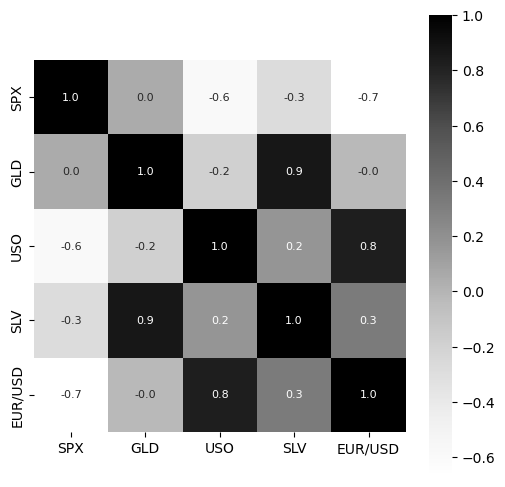

In [17]:
# Using Heatmap to understand the correlation between features
plt.figure(figsize = (6,6))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Greys')

correlation → The correlation matrix you created using .corr()

cbar=True → Shows the color scale bar on the side

square=True → Makes each box square

fmt='.1f' → Shows numbers with 1 decimal place

annot=True → Writes correlation values inside boxes

annot_kws={'size':8} → Font size of numbers

cmap='Greys' → Color style 

In [19]:
# Correlation of the Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


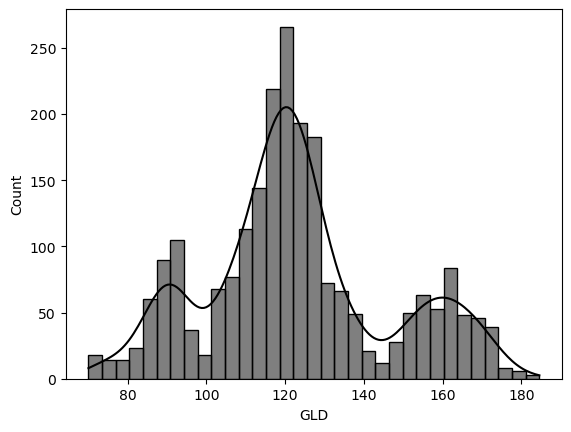

In [27]:
# Checking the distribution of the gold price
sns.histplot(gd['GLD'], color = 'Black', kde = True)
plt.show()

### Separating the features and targets

In [31]:
X = gd.drop(['GLD', 'Date'], axis = 1)
Y = gd['GLD']

Splitting the Targets and Features 

Here, 
     we are dropping Date and GLD column from DataFrame and storing only GLD in Y and droping Date from DataFrame 

In [36]:
 print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [37]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Splitting Data into Training and Test Data

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 26)

Model Training:

RandomForestRegressor

In [40]:
regressor = RandomForestRegressor(n_estimators = 100)

In [44]:
# Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

### Model Evaluation

In [45]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [46]:
print(test_data_prediction)

[ 83.54879853  87.53760068 117.30719848  81.56569983 132.12670015
 105.13089912 114.40779942 124.28379956 152.723       87.94219944
  99.26470146  92.96720053 166.43520101 141.79780225 120.88849834
 145.88050142 167.0057995  123.71750112 125.91550073 148.97129711
  90.46829981 157.93040141 112.92240099 122.09570037  98.77190159
  86.50829955 120.29890047 122.15840082 120.33093748 117.38290046
 127.17079803 117.58879874 161.19459978 108.64069936 154.90100048
  90.34699978 115.51759954 145.74769783 133.31720067 109.96069974
 127.55470077  85.46739905 150.86040127  92.80419975  92.37809928
 114.36059998  99.28500019  89.71029985 101.77769982 148.41910047
 112.42339956 121.59529839 107.14230133 111.9704993   94.06750012
  88.14639916 108.38330063 122.20200014 119.18379934 164.82130193
 121.36279986 121.49288853 165.81809845 127.67230039 110.34149908
 126.00159868 166.69089828 159.80590267 127.76319895 117.46770038
 102.82959963 117.64969801 130.48600172 103.15040028 117.52639817
 156.88220

In [50]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print( 'R squared error:', error_score)

R squared error: 0.992062386306136


#### Now, we compare the actual values and predicted values using plot

In [51]:
# here, I'll convert Y_test into list. because while plotting it gives an error 
Y_test = list(Y_test)

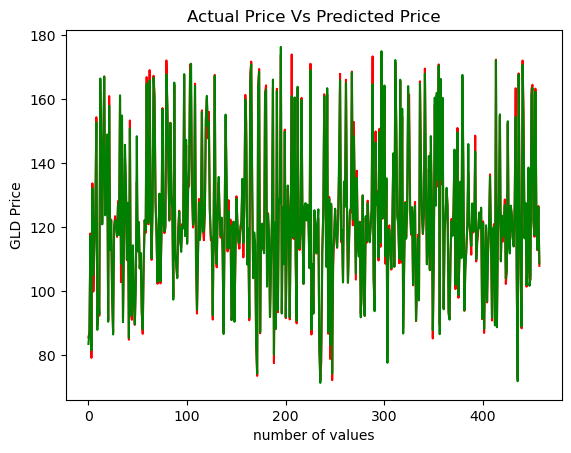

In [52]:
plt.plot(Y_test, color = 'Red', label = 'Actual Price')
plt.plot(test_data_prediction, color = 'Green', label= 'Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('number of values')
plt.ylabel('GLD Price')
plt.legend
plt.show()